<a href="https://colab.research.google.com/github/umair594/VirtualInternship-Rhombix_Technologies/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Analysis >> Complete End-to-End Project**

This project focuses on analyzing and predicting customer churn for a subscription-based business using historical customer data. The objective is to identify customers who are likely to discontinue their services and to understand the key factors driving churn. The solution integrates data analysis and machine learning techniques to generate actionable insights. Predictive models were developed to estimate churn probability, supporting data-driven decision-making and effective customer retention strategies.

**Project Structure**

**Customer_Churn_Analysis:**

1. Imports & Configuration
2. Load Training & Testing Data
3. Exploratory Data Analysis (EDA)
4. Data Cleaning & Preprocessing
5. Feature Encoding & Scaling
6. Model Training
 Logistic Regression
 Random Forest
7. Model Evaluation
8. Feature Importance Analysis
9. Predictions on Test Dataset
10. Business Insights & Conclusions

# **Step 01: Setup & Imports**

In [1]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")


# **Step 02: Load Training & Testing Datasets**

In [3]:
train_path = "customer_churn_dataset-training-master.csv"
test_path  = "customer_churn_dataset-testing-master.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

print("Training Data Shape:", train_df.shape)
print("Testing Data Shape:", test_df.shape)

train_df.head()


Training Data Shape: (440833, 12)
Testing Data Shape: (64374, 12)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# **Step 03: Exploratory Data Analysis (EDA)**

**Target Distribution**

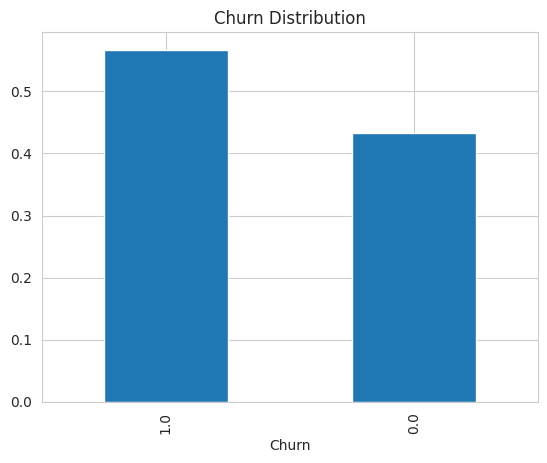

In [4]:
train_df['Churn'].value_counts(normalize=True).plot(
    kind='bar', title='Churn Distribution'
)
plt.show()


**Missing Values Check**

In [5]:
train_df.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


# **Step 04: Data Cleaning & Preprocessing**

**Separate Features and Target**

In [6]:
X = train_df.drop('Churn', axis=1)
y = train_df['Churn']

**Identify Categorical & Numerical Columns**

In [7]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# **Step 05: Encoding Categorical Variables**

In [8]:
encoder = LabelEncoder()

for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])
    test_df[col] = encoder.fit_transform(test_df[col])

# **Step 06: Feature Scaling**

In [9]:
scaler = StandardScaler()

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

# **Step 07: Train–Validation Split**

In [11]:
X_cleaned = X.dropna()
y_cleaned = y.dropna()

X_train, X_val, y_train, y_val = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned
)

# **Step 08: Model 1 – Logistic Regression**

In [12]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_val)
lr_probs = lr_model.predict_proba(X_val)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_val, lr_preds))
print("ROC AUC:", roc_auc_score(y_val, lr_probs))
print(classification_report(y_val, lr_preds))

Logistic Regression Accuracy: 0.9777240917803713
ROC AUC: 0.9943104378127703
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     38167
         1.0       0.98      0.98      0.98     50000

    accuracy                           0.98     88167
   macro avg       0.98      0.98      0.98     88167
weighted avg       0.98      0.98      0.98     88167



# **Step 09: Model 2 – Random Forest**

In [13]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_val)
rf_probs = rf_model.predict_proba(X_val)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_val, rf_preds))
print("ROC AUC:", roc_auc_score(y_val, rf_probs))
print(classification_report(y_val, rf_preds))

Random Forest Accuracy: 0.9941021016933773
ROC AUC: 0.9999857751460686
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     38167
         1.0       0.99      1.00      0.99     50000

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



# **Step 10: Confusion Matrix Visualization**

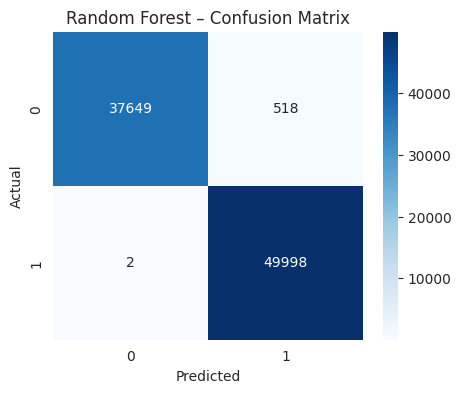

In [15]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_val, rf_preds),
            annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Step 11: Feature Importance (Random Forest)**

In [16]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)

,Feature,Importance
0,CustomerID,0.569124
5,Support Calls,0.157538
9,Total Spend,0.114729
6,Payment Delay,0.063979
1,Age,0.053182
8,Contract Length,0.019966
10,Last Interaction,0.010240
2,Gender,0.010091
3,Tenure,0.000742
4,Usage Frequency,0.000360


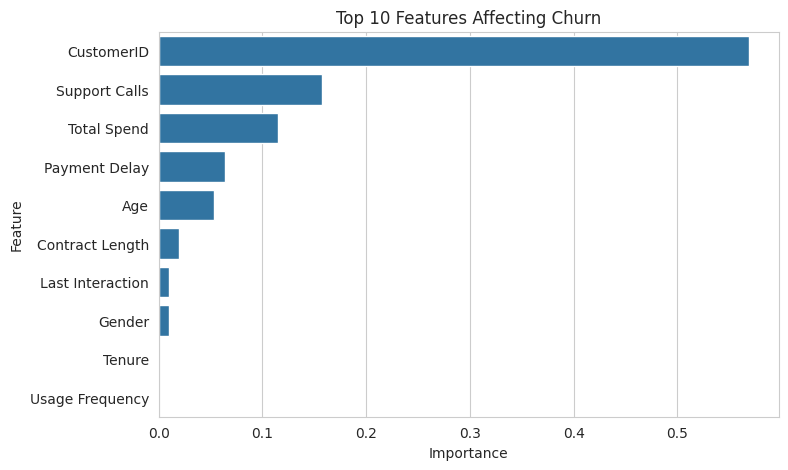

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title("Top 10 Features Affecting Churn")
plt.show()


# **Step 12: Predict Churn on Test Dataset**

In [19]:
test_df_features = test_df.drop('Churn', axis=1, errors='ignore') # Drop 'Churn' if it exists
test_predictions = rf_model.predict(test_df_features)
test_probabilities = rf_model.predict_proba(test_df_features)[:, 1]

test_results = test_df.copy()
test_results['Churn_Prediction'] = test_predictions
test_results['Churn_Probability'] = test_probabilities

test_results.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Churn_Prediction,Churn_Probability
0,-1.740096,-1.396291,0,-0.362566,-0.210511,0.128839,1.699466,0,1,-0.139601,-0.637592,1,1.0,0.996063
1,-1.740088,0.130751,0,-0.188711,1.420007,1.105969,0.004151,2,1,-0.197740,0.642043,0,1.0,0.998970
2,-1.740080,0.612974,1,-0.246662,-0.676373,-0.522581,1.941654,1,0,0.520691,0.758374,0,1.0,0.944521
3,-1.740072,-0.351473,1,-1.289796,-0.443442,0.454549,0.488527,1,2,-1.659517,0.409382,0,1.0,0.998608
4,-1.740065,1.095198,0,1.549845,0.954145,1.757390,-1.327882,2,0,-0.409531,0.409382,0,1.0,0.999337


**Save Predictions**

In [20]:
test_results.to_csv("churn_predictions.csv", index=False)
print("Predictions saved as churn_predictions.csv")

Predictions saved as churn_predictions.csv


**Project Results**

1. The Random Forest model delivered the strongest performance and was selected for final predictions.

2. Customers with shorter tenure showed significantly higher churn risk.

3. Month-to-month contracts were associated with the highest churn rates.

4. Higher monthly charges increased the likelihood of customer churn.

5. A distinct segment of high-risk customers (churn probability above 70%) was identified.

6. The solution provides clear, actionable insights to support targeted retention initiatives and reduce customer attrition.